In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

Proof that reducing r^2 gives a hebbian learning rule. also, Es are reduced when weights are random. For Scalars

Expansion to Vector Es and Rs

In [25]:
Xs = torch.randn(100, 1)
gradient = 2.0
intercept = 0.0
noise_coeff = 0.5
Ys = gradient * Xs + intercept + noise_coeff * torch.randn(100, 1)

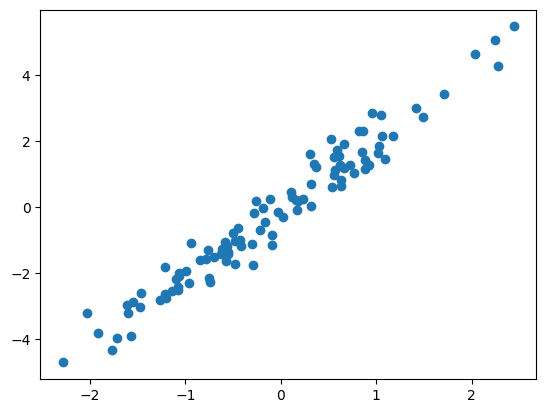

In [26]:
# plot data
import matplotlib.pyplot as plt
plt.scatter(Xs, Ys)

In [140]:
# torch.manual_seed(42)
U1 = nn.Linear(1,1, bias=True)
U1.weight.data = torch.tensor([[1.3]])
print(U1.weight)

def step(x, e1, r1):
    with torch.no_grad():
        e1 = x - torch.matmul(r1, U1.weight.T)
        if U1.bias is not None:
            e1 = e1 - U1.bias
    r1 = r1 + torch.matmul(e1, U1.weight) 
    return e1, r1

def model(x, steps=5):
    r1 = torch.zeros_like(x)
    e1 = torch.zeros_like(x)
    for _ in range(steps):
        e1, r1 = step(x, e1, r1)
    return r1



Parameter containing:
tensor([[1.3000]], requires_grad=True)


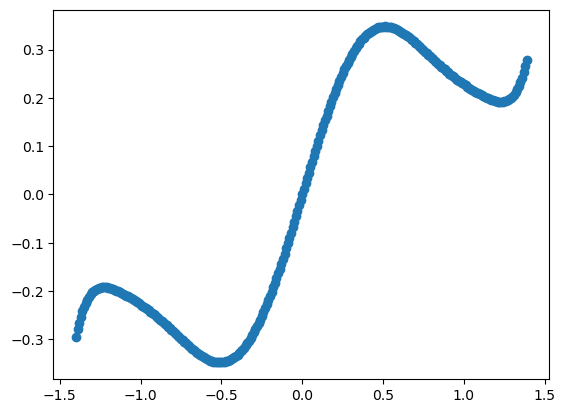

In [141]:
preds = []
ws = []
val = 1.0
for w in range(-140,140):
    new_w = w / 100.0
    ws.append(new_w)
    U1.weight.data = torch.tensor([[new_w]])
    preds.append(model(torch.tensor([[val]])).detach().numpy())

plt.scatter(ws, preds)

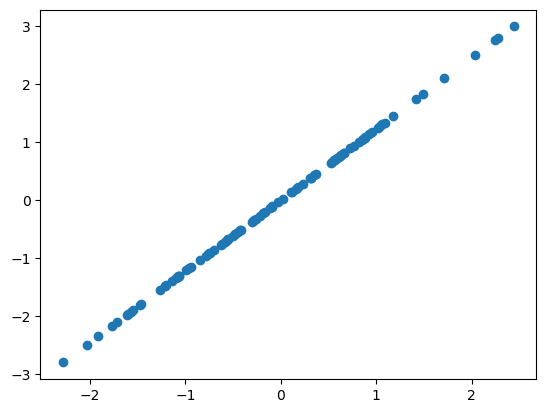

In [139]:
preds = []
for x in Xs:
    preds.append(model(x))
preds = model(Xs)

# preds = torch.stack(preds)
plt.scatter(Xs, preds.detach().numpy())
plt.show()

In [178]:
e1 = e1.detach()
r1 = r1.detach()
e1, r1 = step(x, e1, r1)
print(f" x: {x}")
print(f"e1: {e1}")
print(f"r1: {r1}")

 x: tensor([-1.2655])
e1: tensor([-0.1811])
r1: tensor([-1.5873], grad_fn=<AddBackward0>)


In [197]:
with torch.no_grad():
    U1.weight.grad = torch.zeros_like(U1.weight)
loss = 0.5*((r1**2).sum())
loss.sum().backward()
print(f'U1.weight.grad:\n{U1.weight.grad}')

U1.weight.grad:
tensor([[ 0.6933, -0.4221],
        [ 0.3558, -0.2166],
        [ 0.3064, -0.1865],
        [-0.1959,  0.1192]])
U2.weight.grad:
tensor([[ 0.3013,  0.6518,  0.1750, -0.1821],
        [ 0.2382,  0.5154,  0.1384, -0.1440],
        [ 0.3859,  0.8350,  0.2242, -0.2333],
        [ 0.1283,  0.2775,  0.0745, -0.0776],
        [ 0.1763,  0.3815,  0.1024, -0.1066],
        [-0.0057, -0.0124, -0.0033,  0.0035]])


In [198]:
print(f'1:\n{torch.matmul(e1.unsqueeze(1), r1.unsqueeze(1).T).T}')

1:
tensor([[-0.6933,  0.4221],
        [-0.3558,  0.2166],
        [-0.3064,  0.1865],
        [ 0.1959, -0.1192]], grad_fn=<PermuteBackward0>)
2:
tensor([[-0.3013, -0.6518, -0.1750,  0.1821],
        [-0.2382, -0.5154, -0.1384,  0.1440],
        [-0.3859, -0.8350, -0.2242,  0.2333],
        [-0.1283, -0.2775, -0.0745,  0.0776],
        [-0.1763, -0.3815, -0.1024,  0.1066],
        [ 0.0057,  0.0124,  0.0033, -0.0035]], grad_fn=<PermuteBackward0>)
